# Import all required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data

In [ ]:
file_path = "/content/country_data.csv"
df = pd.read_csv(file_path)
df.head()

,Country,Code,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,AFG,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,ALB,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,DZA,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,ASM,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,AND,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# Step 2: Describe the Data

In [ ]:
columns_to_describe = [
        'Area', 'Pop. Density', 'Coastline',
        'Net migration', 'Infant mortality', 'GDP',
        'Literacy', 'Phones', 'Arable', 'Crops',
        'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
        'Industry', 'Service'
    ]


description = df[columns_to_describe].describe()
description

,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.240000e+02,224.00000,224.000000,221.000000,221.000000,223.000000,208.000000,220.000000,222.000000,222.000000,222.000000,202.000000,221.000000,220.000000,209.000000,208.000000,209.000000
mean,6.062069e+05,363.50000,21.229911,0.019774,35.751041,9762.780269,82.771635,235.849545,13.731982,4.445631,81.822027,2.131188,22.026244,9.302955,0.152388,0.283361,0.563077
std,1.800941e+06,1653.83232,72.745873,4.917240,35.561880,10079.839185,19.746150,229.298958,13.084665,8.281669,16.056040,0.699230,11.161946,4.993753,0.147223,0.138963,0.165653
min,2.000000e+00,0.00000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,5.609500e+03,28.80000,0.100000,-0.980000,8.030000,1900.000000,70.550000,36.950000,3.130000,0.190000,72.572500,2.000000,12.560000,5.977500,0.038000,0.194500,0.427000
50%,8.968050e+04,77.40000,0.725000,0.000000,21.030000,5600.000000,92.400000,172.900000,10.400000,1.020000,85.885000,2.000000,18.790000,8.135000,0.100000,0.271000,0.564000
75%,4.467625e+05,182.52500,9.960000,0.970000,56.290000,15850.000000,98.000000,395.600000,20.000000,4.427500,95.485000,3.000000,29.740000,10.710000,0.224000,0.342250,0.676000
max,1.707520e+07,16271.50000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


# Step 3: Select a specific column (Birthrate example)


In [ ]:
birthrate_df = df[['Country', 'Birthrate']].copy()
birthrate_df.head()

,Country,Birthrate
0,Afghanistan,46.60
1,Albania,15.11
2,Algeria,17.14
3,American Samoa,22.46
4,Andorra,8.71


# HISTOGRAMS
## Histogram - Birthrate
## Find the tallest bar

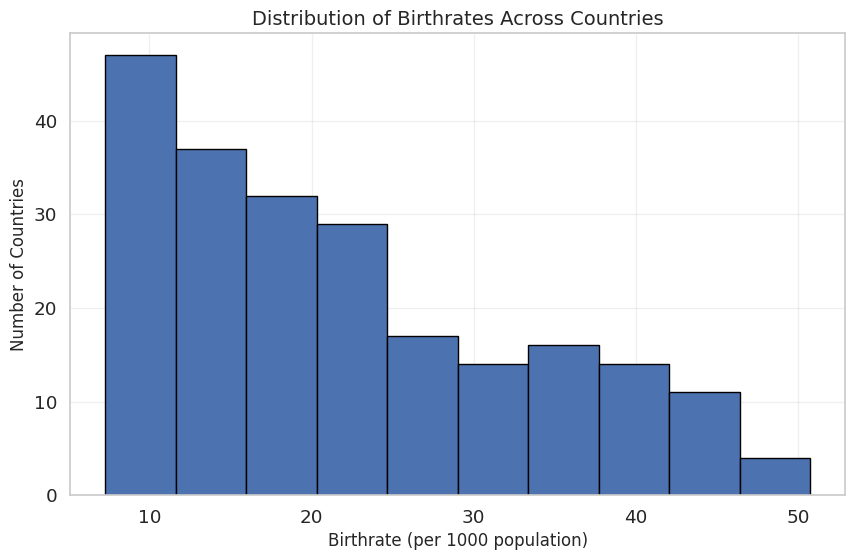

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Birthrate'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Birthrates Across Countries', fontsize=14)
plt.xlabel('Birthrate (per 1000 population)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
birthrate_hist = np.histogram(df['Birthrate'].dropna(), bins=10)
birth_counts = birthrate_hist[0]
birth_edges = birthrate_hist[1]

birth_tallest_idx = np.argmax(birth_counts)
birth_tallest_count = birth_counts[birth_tallest_idx]
birth_tallest_lower = birth_edges[birth_tallest_idx]
birth_tallest_upper = birth_edges[birth_tallest_idx + 1]

print(f"\nBirthrate Histogram Analysis:")
print(f"Tallest bar contains {birth_tallest_count} countries")
print(f"Lower bound: {birth_tallest_lower:.2f}")
print(f"Upper bound: {birth_tallest_upper:.2f}")



Birthrate Histogram Analysis:
Tallest bar contains 47 countries
Lower bound: 7.29
Upper bound: 11.63


## Histogram - Literacy
## Find the tallest bar

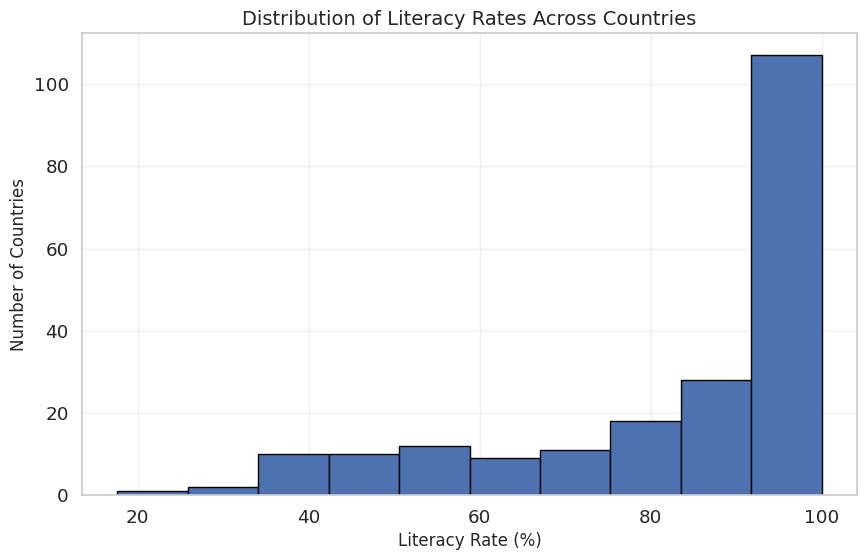

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Literacy'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Literacy Rates Across Countries', fontsize=14)
plt.xlabel('Literacy Rate (%)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
literacy_hist = np.histogram(df['Literacy'].dropna(), bins=10)
lit_counts = literacy_hist[0]
lit_edges = literacy_hist[1]

lit_tallest_idx = np.argmax(lit_counts)
lit_tallest_count = lit_counts[lit_tallest_idx]
lit_tallest_lower = lit_edges[lit_tallest_idx]
lit_tallest_upper = lit_edges[lit_tallest_idx + 1]

print(f"\nLiteracy Histogram Analysis:")
print(f"Tallest bar contains {lit_tallest_count} countries")
print(f"Lower bound: {lit_tallest_lower:.2f}%")
print(f"Upper bound: {lit_tallest_upper:.2f}%")



Literacy Histogram Analysis:
Tallest bar contains 107 countries
Lower bound: 91.76%
Upper bound: 100.00%


# SCATTER PLOTS

## Scatter plot - Population vs Area

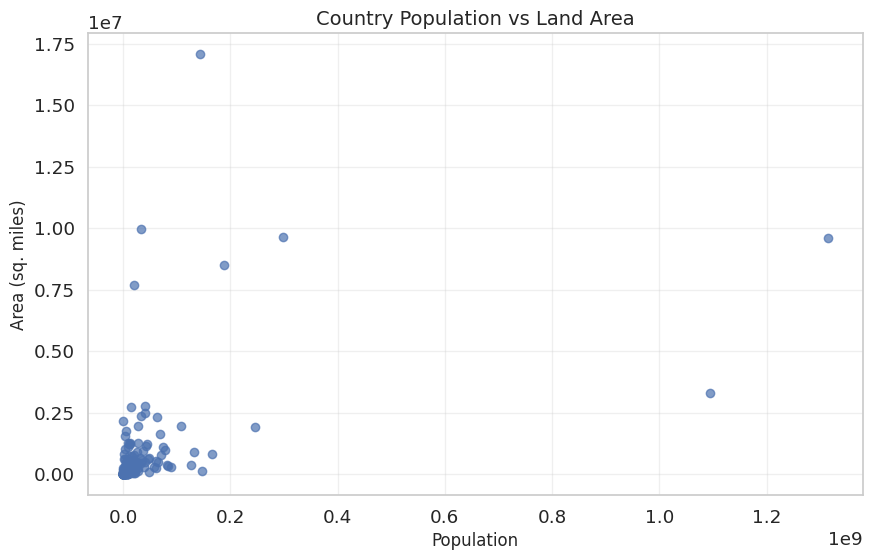

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['Area'], alpha=0.7)
plt.title('Country Population vs Land Area', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Area (sq. miles)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


## 16 scatter plots from combinations of variables

## pairplot (shows all combinations in one plot)

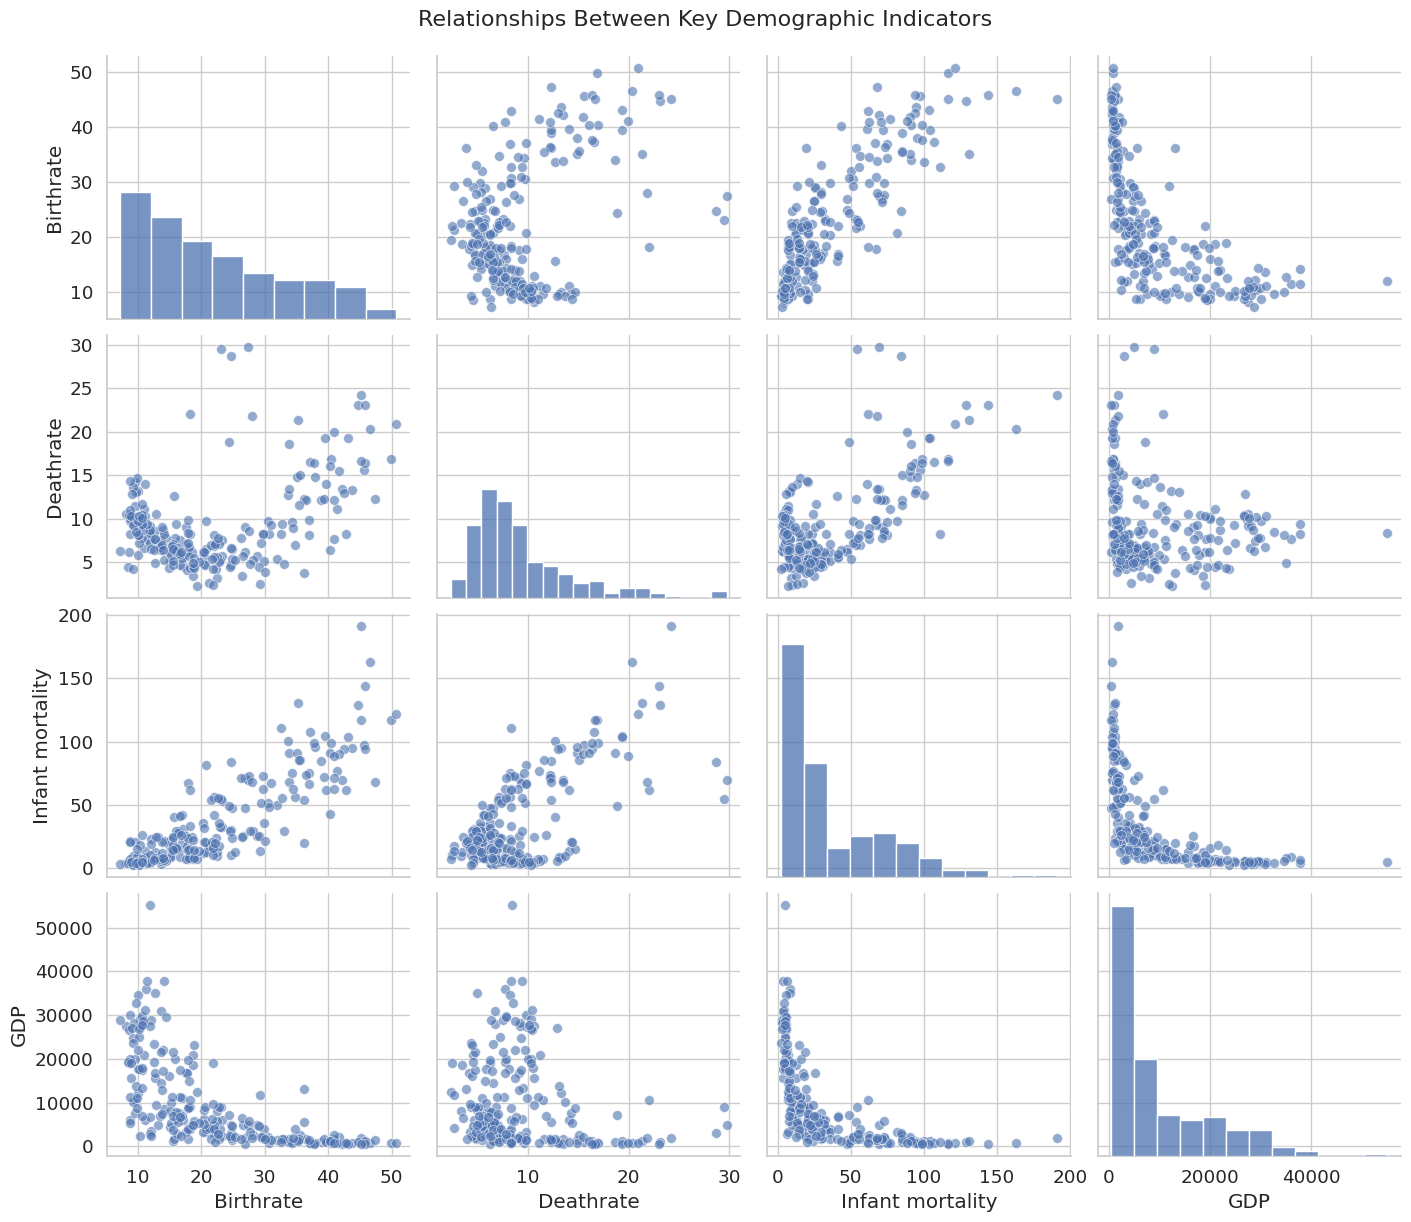

In [ ]:
variables = ['Birthrate', 'Deathrate', 'Infant mortality', 'GDP']

sns.set(style="whitegrid", font_scale=1.2)
pair_plot = sns.pairplot(df[variables].dropna(), height=3, aspect=1.2,
                        plot_kws={'alpha': 0.6, 's': 50})
pair_plot.fig.suptitle('Relationships Between Key Demographic Indicators', y=1.02, fontsize=16)
plt.show()

# correlation matrix

## heatmap of the correlation matrix



Correlation Matrix:
                  Birthrate  Deathrate  Infant mortality   GDP
Birthrate              1.00       0.41              0.86 -0.65
Deathrate              0.41       1.00              0.66 -0.21
Infant mortality       0.86       0.66              1.00 -0.61
GDP                   -0.65      -0.21             -0.61  1.00


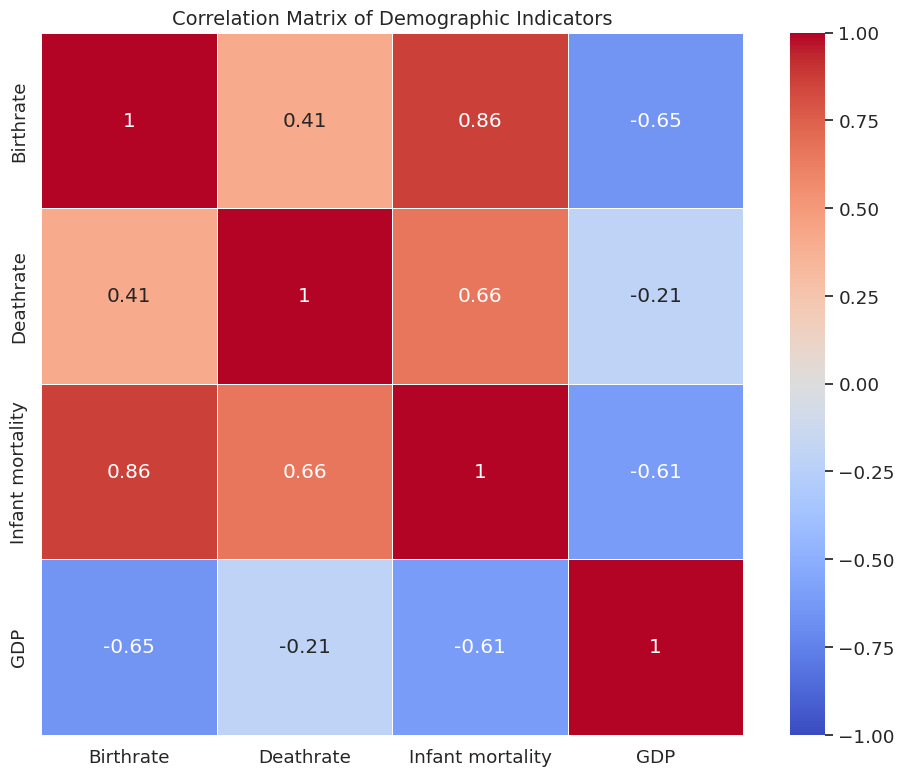

In [ ]:

correlation_matrix = df[variables].corr().round(2)
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))dream11l
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            square=True, linewidths=.5)
plt.title('Correlation Matrix of Demographic Indicators', fontsize=14)
plt.tight_layout()
plt.show()